# Final Report

## Introduction.
Last summer and continuing remotely, I have been working at MassGeneral Hospital for Children as a digital marketing and web development intern. MGHfC struggles to some extent with brand recognition in competition with other childrens' hospitals and healthcare facilities, and as such the digital marketing department at MGHfC has been publishing more patient education pages on the website about conditions treated at the clinics of MGH's children's hospital to try and rank in Google and generate more site traffic and appointments.

Despite their recent creation and upkeep, MGHfC's pages are often surpassed in Google rankings by those of the Mayo Clinic, the widely acclaimed healthcare company based in Minnesota. Whereas the Mayo Clinic ranks in Google for 2.5m keywords, MGHfC ranks for 90,813 (data obtained from analysis on https://moz.com/). In this project I will be analyzing the contents of their education pages about the symptoms and causes of the diseases and conditions listed on the Mayo Clinic website to determine which specific features of their web pages, if any, are boosting their rank in search so often and so highly.

This report concludes that there is no clear pattern to how the analyzed features of the Mayo Clinic's Symptoms and Causes pages affect these pages' ranking in search. This finding is not definitive; the methods applied to analyze the data were not appropriate for the dataset in question. Readers may pursue inquiries about search engine optimization tactics by taking next steps to obtain comparative data about pages that do not rank at all in search, thus implementing logistic regression to predict the fact of whether a page will rank in search at all or not, rather than attempting to discriminate between how "well" a page might rank given different attributes.

## Data description.

###  Why was this dataset created?
The final dataset I am working with is a self-contained dataset of URLs that I scraped from the Mayo Clinic's site and cross-referenced with data about those pages provided by Screaming Frog SEO Spider (yes, that is actually the name of the application), an SEO analysis helper tool that I have access to due to my internship position. I added two more columns of data about those pages by scraping the publication date of the pages myself and adding information provided by another tool, Moz Pro, about how well pages rank in search.

### What processes might have influenced what data was observed and recorded and what was not?
SEO Spider provides valuable information that I would not otherwise be able to gather–data about the types of links on the web pages (internal, external, unique...). Due to the way the Mayo Clinic's symptoms and causes URLs are structured, I had to filter out the pages that I wanted from the data Spider provided, which included other pages listed under Diseases and Conditions that were not Symptoms and Causes pages. To find the pages I wanted, I scraped their URLs from the Mayo Clinic website and (inner) merged those from the ones provided by the SEO Spider crawl (which retrieved most of the population of Symptoms and Causes pages in the English language on the Mayo Clinic site by crawling to a depth of 2). I then merged that dataset one more time with data from Moz about whether the URL was included in the top visited pages on the Mayo Clinic's domain as measured by Moz.

### What preprocessing was done, and how did the data come to be in the form that you are using?
In terms of the SEO Spider data, I crawled https://www.mayoclinic.org/diseases-conditions to a depth of 2 and downloaded a .csv file that I cleaned, filtered, and aggregated so that the resulting dataset only included the columns relevant to my research question. I left behind address (the "ugly" (non-canonical) version of the final url), status code (which I can access myself with code, and should be 200, not very interesting for data analysis), page title and headers besides H1-1, which are standard across Symptoms and Causes pages, and columns that Spider left blank.

On Moz, I did link research on the Mayo Clinic domain and downloaded a .csv file of the top 500 most visited pages, those on their website with the highest page authority. I then created a new column in my larger dataset indicating whether the Symptoms and Causes URL listed was among those 500 top-ranking pages or not.

### What are the observations (rows) and the attributes (columns)?
**Observations:** (1082) Each row contains information about the symptoms and causes page for a disease or condition listed on the Mayo Clinic website.

**Attributes:** (15) The page's canonical **url**, its primary **header** (H1-1, also the name of the condition described), **header length,** **meta description** of the page (what shows up in the Google result), **meta description length**, the size of the page in **bytes**, the **word count** of the page, its **inlinks** (internal links pointing to a given URL from the same subdomain that is being crawled), **unique inlinks** (count several internal links from the same subdomain page as 1), **outlinks** (internal links to other URLs on the same subdomain), **unique outlinks,** **external outlinks** (links to another subdomain), **unique external outlinks,** whether a page is a **top** page of the domain, and the page's **publication date.**

### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
People are tangentially involved–the data I analyzed consdiers how webpages were designed by a individual or team of individuals–whether they were web designers working for the Mayo Clinic or working for a separate company that created the website template in use by the Mayo Clinic–and the structure and content of each of those pages, which likely have many different authors. Data about the people themselves was not involved in my analysis; only data about their work.

### Who funded the creation of the dataset?
The licenses for SEO Spider and Moz Pro are funded by the MGH Marketing Department. My internship is unpaid–I am not completing this work for compensation besides my standing in this course, and the idea of applying this project to the area of my internship was entirely my own.

To my knowledge, no one working for the Mayo Clinic is aware of this project, and none of the data used is confidential, private, or upsetting.

This dataset has not yet been used for any tasks besides the analysis of this project. It could potentially be used by other competitors of the Mayo Clinic or the Mayo Clinic itself to attempt to improve marketing strategies. This data should not be used to compromise the Mayo Clinic or any associated groups.

### Import Libraries

In [438]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from datetime import datetime
import matplotlib.dates as dt
from bs4 import BeautifulSoup
import requests
import re

### Read In the Dataset

In [439]:
# read in polished dataset from collection-4.ipynb
data = pd.read_csv("data.csv", index_col=0)
data.head()

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,pa,pub_date
0,https://www.mayoclinic.org/diseases-conditions...,digeorge syndrome (22q11.2 deletion syndrome),45,DiGeorge syndrome (22q11.2 deletion syndrome) ...,151,57561,2212,13,7,70,44,67,45,0.0,2017-07-18
1,https://www.mayoclinic.org/diseases-conditions...,atrial fibrillation,19,"Find out about atrial fibrillation, a heart co...",152,68770,2732,31,19,100,71,75,52,1.0,2019-06-20
2,https://www.mayoclinic.org/diseases-conditions...,abdominal aortic aneurysm,25,An abdominal aortic aneurysm can grow slowly a...,128,48752,1530,26,15,78,49,67,45,0.0,2019-03-15
3,https://www.mayoclinic.org/diseases-conditions...,hyperhidrosis,13,"Learn more about causes, symptoms, treatment a...",153,45026,1385,16,11,75,46,67,45,0.0,2017-10-27
4,https://www.mayoclinic.org/diseases-conditions...,bartholin's cyst,16,A Bartholin's cyst is a fluid-filled lump near...,126,43037,1202,12,6,70,44,67,45,0.0,2020-04-24


In [440]:
# clarify that the pa column is now a binary measure of whether a URL is
# one of the Mayo Clinic's 500 top-ranking pages or not
data = data.rename(columns={'pa':'top'})

In [441]:
# triple check for null values
data.isnull().values.any()

False

In [442]:
# final dataset counts
data.shape

(1082, 15)

## Data analysis.
*Use summary functions like mean and standard deviation along with visual displays like scatter plots and histograms to describe data. Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.*

*Clearly detail your methods used in each part. Qualitative claims made in the exposition should have numerical backing here (instead of “X is larger than Y” write “X is 3.65 times larger than Y”). This should read like a scientific paper, but does not need to be "stuffy" or overly indirect. A reader should be able to replicate your experiments and findings via their own code after reading this.*

In [443]:
data.columns

Index(['url', 'header', 'header_len', 'meta', 'meta_len', 'bytes',
       'word_count', 'inlinks', 'unique_in', 'outlinks', 'unique_out',
       'ext_links', 'unique_ext', 'top', 'pub_date'],
      dtype='object')

### Define functions with which to analyze the data

In [444]:
# function to examine a column of data with summary functions and visual displays
def examine(df, column, bins):
    plt.hist(df[column], bins=bins)
    plt.title(column)
    plt.show()
    print("min:", df[column].min())
    print("max:", df[column].max())
    print("mean:", df[column].mean())
    print("variance:", df[column].var())
    print("stan dev:", df[column].std())

In [445]:
# function to look at the data in a specific range (excluding outliers)
def exclude(df, column, start, end, bins):
    plt.hist(df[column], range = (start, end), bins=bins)
    plt.title(column + ": range " + str(start) + " - " + str(end))
    plt.show()

In [446]:
# scatterplot, covariance, and correlation coefficients
def relate(x, y):
    plt.scatter(x,y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()
    print("Covariance:", round(np.cov(x, y)[0,1],5))
    print("Pearson Correlation Coefficient:", round(np.corrcoef(x,y)[0,1],5))
    print("Spearman Correlation Coefficient:", round(np.corrcoef(x.rank(), y.rank())[0][1],5))

In [447]:
# linear regression
def lin(x, y):
    model = LinearRegression().fit(data[[x]], data[y])
    print(x, "and", y, ":")
    print("slope (coefficient): %.5f" % (model.coef_))
    print("intercept: %.5f" % model.intercept_)
    print()

In [448]:
# joint linear regression to predict another variable
def joint(columns, var):
    model = LinearRegression().fit(data[columns], data[var])
    print("intercept: %.4f" % model.intercept_)
    print("score: %.4f" % model.score(data[columns], data[var]))
    print()
    print()
    for i in range(len(columns)):
        print(columns[i])
        print("coef: %.4f" % model.coef_[i])
        print()

In [449]:
# function to compute and display logistic regression
def log_reg(column1, column2):
    model = LogisticRegression(solver="lbfgs").fit(column1.values.reshape(-1, 1), column2)
    print("Coefficient:", model.coef_)
    print("Intercept:", model.intercept_)

    plt.scatter(column1, column2 + np.random.normal(0, 0.05, size=len(column1)), alpha=0.1)
    x_values = np.linspace(column1.min(), column1.max(), 500) #start, stop, num
    # code adapted from Food Prefs
    y_values = (np.exp(x_values * model.coef_[0,0] + model.intercept_[0])) / (1 + (np.exp(x_values * model.coef_[0,0] + model.intercept_[0])))
    plt.plot(x_values, y_values)
    
    plt.xlabel(column1.name)
    plt.ylabel(column2.name)
    plt.show()

### Header Length (H1-1)

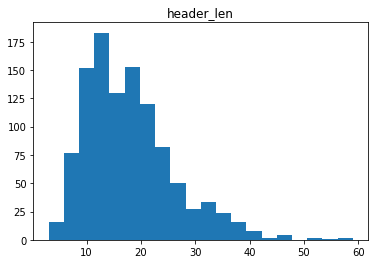

min: 3
max: 59
mean: 17.83086876155268
variance: 67.76877796795944
stan dev: 8.232179417867387


In [450]:
examine(data, "header_len", 20)

SEO strategy recommends short, descriptive h1 headers that contain a page keyword; here, that means the name of the condition. It thus is unsurprising that the data peaks between 10 and 20 characters. It is not a normal distribution, since headers are more likely to have more characters than fewer; those that have more are likely conditions with long names or two different names (one more scientific, one translated from medical terminology into a name more evident), where one is listed after the other in parentheses. 

In [451]:
# like these
data[data["header_len"]>40]['header'].values.tolist()

['digeorge syndrome (22q11.2 deletion syndrome)',
 'attention-deficit/hyperactivity disorder (adhd) in children',
 'adult attention-deficit/hyperactivity disorder (adhd)',
 'benign paroxysmal positional vertigo (bppv)',
 'subconjunctival hemorrhage (broken blood vessel in eye)',
 'paraneoplastic syndromes of the nervous system',
 'diffuse idiopathic skeletal hyperostosis (dish)',
 'persistent depressive disorder (dysthymia)',
 'premature ventricular contractions (pvcs)',
 'focal segmental glomerulosclerosis (fsgs)',
 'functional neurologic disorders/conversion disorder',
 'helicobacter pylori (h. pylori) infection',
 'monoclonal gammopathy of undetermined significance (mgus)',
 'orthostatic hypotension (postural hypotension)',
 'small intestinal bacterial overgrowth (sibo)']

Coefficient: [[-0.02408413]]
Intercept: [-0.9707755]


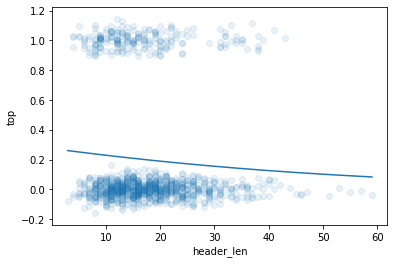

In [452]:
# logistic regression of slight negative relationship between header length and top-ranking pages
log_reg(data.header_len, data.top)

### Meta Description Length

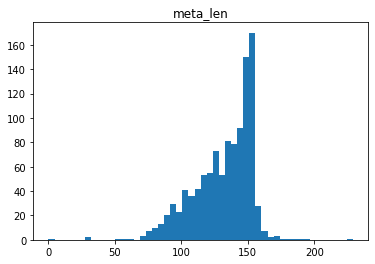

min: 0
max: 229
mean: 131.9260628465804
variance: 498.3238529396175
stan dev: 22.323168523747196


In [453]:
examine(data, "meta_len", 50)

In [454]:
len(data.loc[data["meta_len"]>160]['meta_len'])

18

According to Moz (https://moz.com/learn/seo/meta-description), Google usually only shows meta descriptions up to 160 characters long. The Mayo Clinic has kept all but 18 of their top-ranking Symptoms and Causes meta descriptions within this limit.

In [455]:
# no linear relationship between length of meta description and top-ranking pages, not very surprising
lin('meta_len', 'top')

meta_len and top :
slope (coefficient): 0.00040
intercept: 0.14723



### Page Size (bytes)

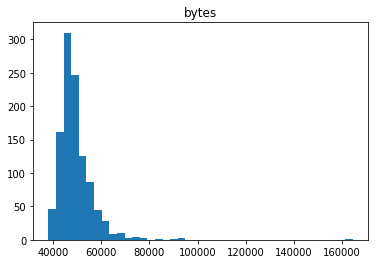

min: 38098
max: 164386
mean: 49309.71072088725
variance: 55150230.49440855
stan dev: 7426.3201179594025


In [456]:
examine(data, "bytes", 40)

In [457]:
# the outlier is a page on COVID-19!
data.loc[data["bytes"]==164386]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
420,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1.0,2020-05-22


Unsurprisingly, the largest page is a page on COVID-19, to which the Mayo Clinic may well still be adding as the world continues to research the virus that has caused the current pandemic. The publication date is listed as May 21st, 2020, the current date on which this report is being written.

In [458]:
without = data.loc[data["bytes"]<164386]
data.loc[data.bytes == without['bytes'].max()]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1.0,2019-11-22


The next largest page after the one on Coronavirus is one about Breast Cancer, and it is 70480 fewer bytes in size, about 72 MB. The page on COVID-19 is substantially larger in size.

When we exclude the size of the coronavirus page, there is a clear trend between the other less substantial outliers:

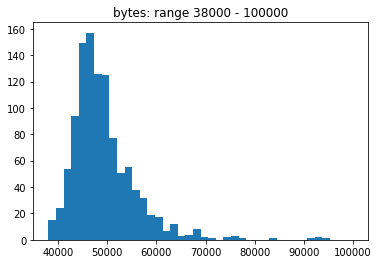

In [459]:
exclude(data, 'bytes', 38000, 100000, 40)

In [460]:
without.loc[without.bytes>80000]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
78,https://www.mayoclinic.org/diseases-conditions...,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,15,7,127,85,97,73,1.0,2018-12-08
220,https://www.mayoclinic.org/diseases-conditions...,high blood pressure (hypertension),34,"Learn about the symptoms, treatment and preven...",142,83830,3147,9,3,131,92,85,58,1.0,2018-05-12
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1.0,2019-11-22
276,https://www.mayoclinic.org/diseases-conditions...,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,1.0,2018-12-12
329,https://www.mayoclinic.org/diseases-conditions...,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,39,26,130,88,88,64,1.0,2018-03-22


These larger pages are all about more commonly diagnosed conditions with various forms.

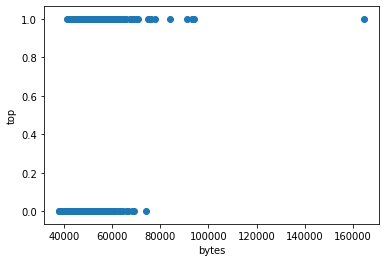

Covariance: 1163.81543
Pearson Correlation Coefficient: 0.39188
Spearman Correlation Coefficient: 0.36918


In [461]:
# a little bit of positive correlation, due to outlier of large coronavirus page, but not significant
relate(data.bytes, data.top)

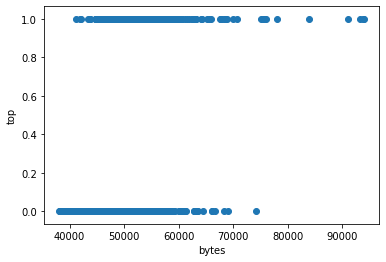

Covariance: 1079.53306
Pearson Correlation Coefficient: 0.41258
Spearman Correlation Coefficient: 0.36716


In [462]:
# removing outlier, more positive correlation, still may not be significant
relate(without.bytes, without.top)

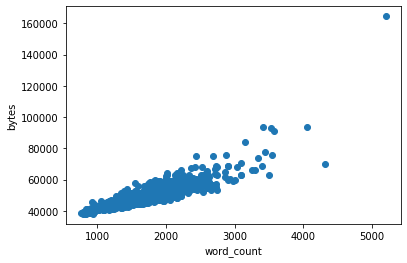

Covariance: 3038495.20639
Pearson Correlation Coefficient: 0.85714
Spearman Correlation Coefficient: 0.87889


In [463]:
# word count and page size positively correlated
relate(data.word_count, data.bytes)

In [464]:
lin('word_count', 'bytes')

word_count and bytes :
slope (coefficient): 13.33484
intercept: 27034.20984



### Word Count

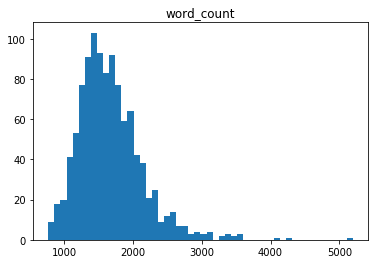

min: 768
max: 5194
mean: 1670.4731977818853
variance: 227861.3096417536
stan dev: 477.34820586418215


In [465]:
examine(data, "word_count", 50)

Word count is a little more difficult to analyze in terms of SEO. Web pages should not be too thin, and should include good "anchor content" unique to the page and the subject, but lots of content does not necessarily mean that it is of good quality. There is a general consensus in the SEO world that a word count of around 1500 is average for high-ranking pages, though the suggested amount of content varies for different kinds of web pages (such as a blog versus a healthcare education page). The Mayo Clinic's average word count is 1655 for their Symptoms and Causes pages, but we can see from the histogram that there appear to be some outliers affecting that number.

In [466]:
# unsurprisingly, coronavirus again
data.loc[data["word_count"]==5194]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
420,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1.0,2020-05-22


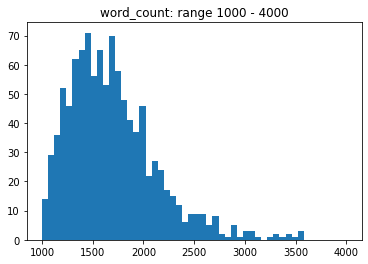

In [467]:
exclude(data, 'word_count', 1000, 4000, 50)

In [468]:
# other pages with word count far above average
data.loc[data["word_count"]>4000]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
30,https://www.mayoclinic.org/diseases-conditions...,drug addiction (substance use disorder),39,"With drug addiction (substance use disorder), ...",160,70000,4308,10,5,74,46,69,46,1.0,2017-10-26
329,https://www.mayoclinic.org/diseases-conditions...,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,39,26,130,88,88,64,1.0,2018-03-22
420,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1.0,2020-05-22


The pages besides coronavirus with high word count are heart disease and substace abuse disorder. Both are relatively common conditions, and both describe a range of conditions, explaining the need for more words.

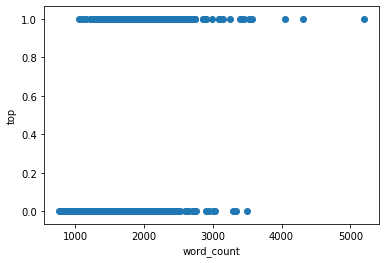

Covariance: 75.90175
Pearson Correlation Coefficient: 0.39761
Spearman Correlation Coefficient: 0.36551


In [469]:
# word count and page rank are positively correlated, but not significantly so
relate(data.word_count, data.top)

Coefficient: [[0.00213292]]
Intercept: [-5.17393072]


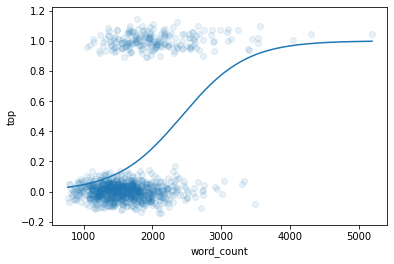

In [470]:
# effect of word count on top rank near 0
log_reg(data.word_count, data.top)

### Inlinks
*Number of links to this page on the Mayo Clinic domain.*

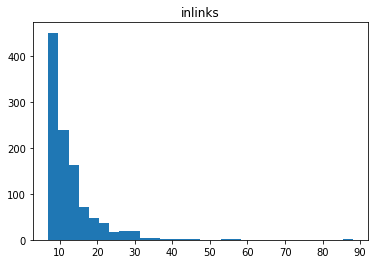

min: 7
max: 88
mean: 12.5452865064695
variance: 45.659834376672514
stan dev: 6.757206107310366


In [471]:
examine(data, "inlinks", 30)

Most Symptoms and Causes pages on the Mayo Clinic site seem to have around 10 other Mayo Clinic pages linking to them. These would likely be related conditions and the Diagnosis and Treatment, Doctors and Departments, and Care at Mayo Clinic pages for the condition, as well as the index page the condition is listed under and any other related page on the website that for which linking to a Symptoms and Causes page would make sense.

In [472]:
data[data.inlinks>60]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1.0,2019-11-22


It's interesting that breast cancer is the page with the most internal inlinks of those that I am examining. There are several types of breast cancer as well as conditions that can lead to breast cancer, and of course there are also many other kinds of cancer. It is possible that such pages link between one another on the Mayo Clinic domain.

In [473]:
data[data.inlinks>50]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
141,https://www.mayoclinic.org/diseases-conditions...,heart arrhythmia,16,Learn about common heart disorders that can ca...,103,68502,3397,54,34,94,65,67,45,1.0,2019-11-19
240,https://www.mayoclinic.org/diseases-conditions...,brain tumor,11,Find out more about the different brain tumor ...,122,60423,2007,57,31,105,77,70,48,0.0,2019-04-27
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1.0,2019-11-22
409,https://www.mayoclinic.org/diseases-conditions...,congenital heart disease in adults,34,Learn about treatments and complications of he...,114,60740,2005,53,29,112,83,70,48,0.0,2020-05-14


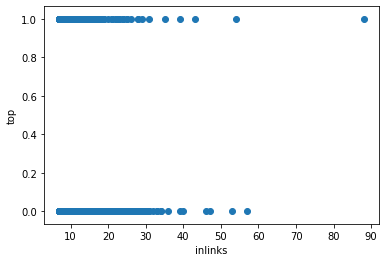

Covariance: 0.08993
Pearson Correlation Coefficient: 0.03328
Spearman Correlation Coefficient: 0.03072


In [474]:
# little correlation between inlinks and page authority
relate(data.inlinks, data.top)

### Unique Inlinks
*Number of links to this page on the Mayo Clinic domain with links from the same page counted only once.*

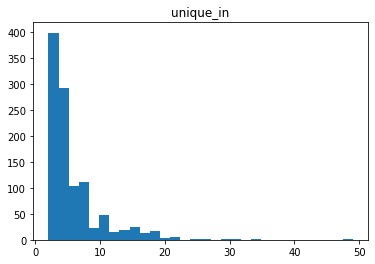

min: 2
max: 49
mean: 5.779112754158965
variance: 20.725446760632735
stan dev: 4.552520923689724


In [475]:
examine(data, "unique_in", 30)

This data largely resembles the total inlinks, except on a smaller scale.

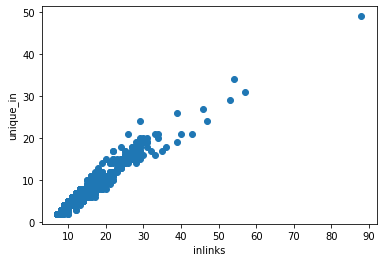

Covariance: 29.87912
Pearson Correlation Coefficient: 0.97129
Spearman Correlation Coefficient: 0.96545


In [476]:
# very positively correlated
relate(data.inlinks, data.unique_in)

In [477]:
# linear model is a good fit
lin("inlinks", "unique_in")

inlinks and unique_in :
slope (coefficient): 0.65439
intercept: -2.43034



In [478]:
data[data.unique_in>35]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1.0,2019-11-22


As one would therefore expect, the page that had the most inlinks also has the most unique inlinks.

### Outlinks
*Number of links from this page to other pages on the Mayo Clinic domain.*

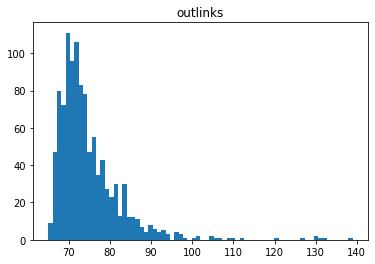

min: 65
max: 139
mean: 74.88817005545286
variance: 64.16232060750211
stan dev: 8.01013861350115


In [479]:
examine(data, "outlinks", 70)

We can see that Symptoms and Causes pages tend to link more to other page on the Mayo Clinic domain than be linked to. This is largely intuitive since it is more common for pages about conditions and diseases to link to pages for clinics that treat them, research summaries about them, or patient stories than for those pages to link back to the page for the condition itself. 

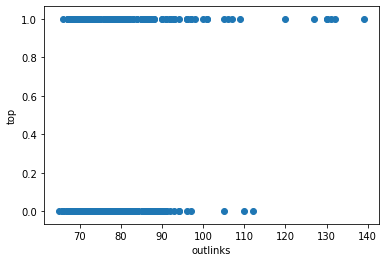

Covariance: 0.93631
Pearson Correlation Coefficient: 0.2923
Spearman Correlation Coefficient: 0.21562


In [480]:
# some positive corr but not significant
relate(data.outlinks, data.top)

### Unique Outlinks
*Number of links from this page to other pages on the Mayo Clinic domain with links to the same page counted only once.*

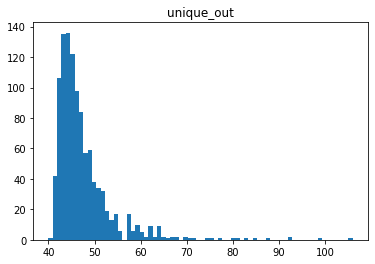

min: 40
max: 106
mean: 47.34195933456562
variance: 43.87925536189706
stan dev: 6.624141858527568


In [481]:
examine(data, "unique_out", 70)

Again, this data resembles the data for total outlinks in shape; we still get the outliers.

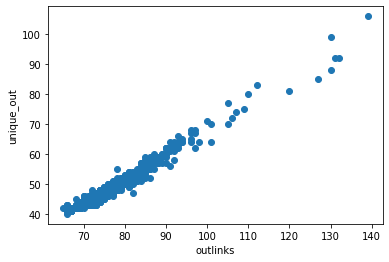

Covariance: 52.22144
Pearson Correlation Coefficient: 0.98419
Spearman Correlation Coefficient: 0.96658


In [482]:
# very positively correlated
relate(data.outlinks, data.unique_out)

In [483]:
# good fit
lin('outlinks', 'unique_out')

outlinks and unique_out :
slope (coefficient): 0.81390
intercept: -13.60920



### External Links
*Number of links from this page to another website (another domain).*

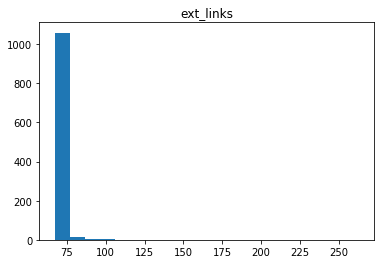

min: 67
max: 263
mean: 68.69870609981515
variance: 43.70007232982398
stan dev: 6.6106030231608965


In [484]:
examine(data, "ext_links", 20)

The skew in the data here looks more extreme.

In [485]:
data[data.ext_links>100]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
276,https://www.mayoclinic.org/diseases-conditions...,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,1.0,2018-12-12
420,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1.0,2020-05-22


The Symptoms and Causes pages on the Mayo Clinic domain with the most links to other websites are those for cancer and coronavirus, widespread, newsworthy, very serious conditions that are currently affecting the lives of many, and about which people need a wealth of information to learn from and respond to to help with prevention and treatment.

Cancer's external links are about 5 standard deviations above the mean, while coronavirus is almost 29.

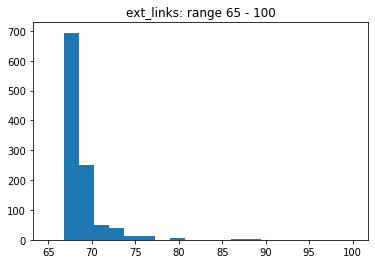

In [486]:
exclude(data, "ext_links", 65, 100, 20)

In [487]:
data[data.ext_links>90]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
78,https://www.mayoclinic.org/diseases-conditions...,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,15,7,127,85,97,73,1.0,2018-12-08
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1.0,2019-11-22
276,https://www.mayoclinic.org/diseases-conditions...,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,1.0,2018-12-12
420,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1.0,2020-05-22


Other pages with high numbers of external links include breast cancer and Alzheimer's.

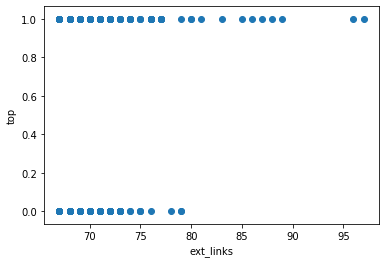

Covariance: 0.42259
Pearson Correlation Coefficient: 0.38459
Spearman Correlation Coefficient: 0.34876


In [488]:
# data without outliers
relate(data.ext_links[data.ext_links<100], data.top[data.ext_links<100])

### Unique External Links
*Number of links from this page to another website with links to the same page counted only once.*

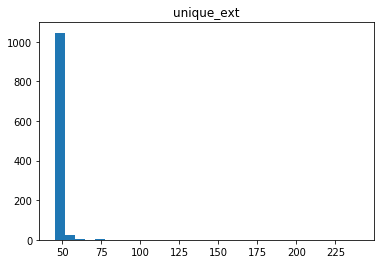

min: 45
max: 240
mean: 46.33456561922366
variance: 41.423577470713276
stan dev: 6.43611509147508


In [489]:
examine(data, "unique_ext", 30)

The average number of unique external outlinks is almost 20 fewer than the average number of all external outlinks, but in both histograms we can see the very tall peak around the mean. 

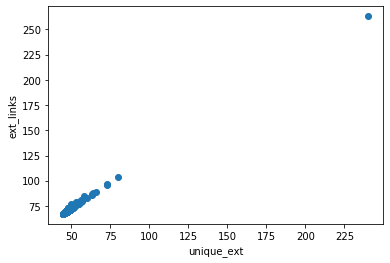

Covariance: 42.35992
Pearson Correlation Coefficient: 0.99561
Spearman Correlation Coefficient: 0.98853


In [490]:
# positively correlated with big gap
relate(data.unique_ext, data.ext_links)

In [491]:
# approximately 1:1 ratio, very linear relationship
lin('unique_ext', 'ext_links')

unique_ext and ext_links :
slope (coefficient): 1.02260
intercept: 21.31679



In [492]:
data[data.unique_ext>80]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
420,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1.0,2020-05-22


In [493]:
focus = data[data.unique_ext<200]
print("The outlier here is again coronavirus, which has", round(data.ext_links.max() / focus.ext_links.max(), 3),
      "times as many external links and")
print(data.unique_ext.max() / focus.unique_ext.max(),
      "times as many unique external links as any other URL in the dataset.")

The outlier here is again coronavirus, which has 2.529 times as many external links and
3.0 times as many unique external links as any other URL in the dataset.


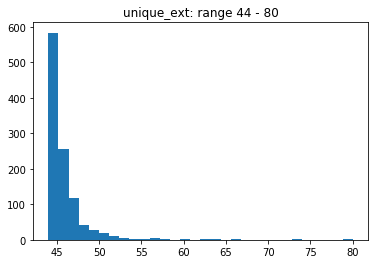

In [494]:
exclude(data, "unique_ext", 44,80, 30)

In [495]:
# look at other outliers
focus[focus.unique_ext>65]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
78,https://www.mayoclinic.org/diseases-conditions...,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,15,7,127,85,97,73,1.0,2018-12-08
242,https://www.mayoclinic.org/diseases-conditions...,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,1.0,2019-11-22
276,https://www.mayoclinic.org/diseases-conditions...,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,1.0,2018-12-12
607,https://www.mayoclinic.org/diseases-conditions...,influenza (flu),15,"Learn more about the symptoms, causes and prev...",131,68565,2899,8,3,82,50,89,66,1.0,2019-10-04


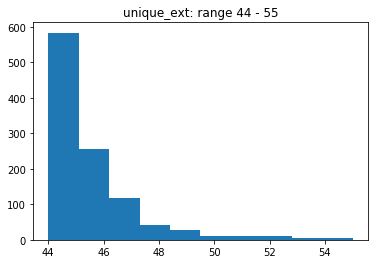

In [496]:
exclude(data, "unique_ext", 44, 55, 10)

Zooming in on the data closer to the mean, we get a better sense of the distribution. The decrease in number of pages with increased unique external links looks exponential.

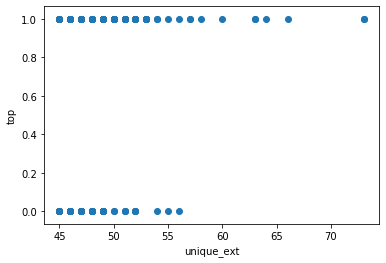

Covariance: 0.36001
Pearson Correlation Coefficient: 0.37995
Spearman Correlation Coefficient: 0.35358


In [497]:
# some positive correlation between unique external links and top ranking page authority
relate(data.unique_ext[data.unique_ext<80], data.top[data.unique_ext<80])

### Most Recent Publication Date

In [498]:
data.pub_date[0]

'2017-07-18'

In [499]:
# check date type
type(data.pub_date[0])

str

In [500]:
# convert pub_date from string to datetime_ob
dat = []
for date in data.pub_date:
    ob = datetime.strptime(date, '%Y-%m-%d')
    dat.append(ob)
    
# convert pub_date from datetime_ob to float
data.pub_date = dt.date2num(dat)
type(data["pub_date"][0])

numpy.float64

In [501]:
print("min:", data["pub_date"].min(), dt.num2date(data["pub_date"].min()).strftime('%Y-%m-%d'))
print("max:", data["pub_date"].max(), dt.num2date(data["pub_date"].max()).strftime('%Y-%m-%d'))

min: 736230.0 2016-09-23
max: 737567.0 2020-05-22


In [502]:
# updated again today! (may 22, 2020)
data[data.pub_date == 737567.0]

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,top,pub_date
11,https://www.mayoclinic.org/diseases-conditions...,gastroesophageal reflux disease (gerd),38,"GERD, in which stomach acid moves into the eso...",140,52830,1555,16,8,85,52,71,47,1.0,737567.0
74,https://www.mayoclinic.org/diseases-conditions...,hair loss,9,Hair loss — Learn about the causes and treatme...,150,57288,2046,11,6,79,48,72,50,1.0,737567.0
420,https://www.mayoclinic.org/diseases-conditions...,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,1.0,737567.0


In [503]:
# approximately 0 linear relationship between publication date and whether a page ranks in the top 500
lin('pub_date', 'top')

pub_date and top :
slope (coefficient): 0.00009
intercept: -67.17998



### Joint Linear Regression with all measurable variables

In [504]:
all_vars = ['header_len', 'meta_len', 'bytes',
       'word_count', 'inlinks', 'unique_in', 'outlinks', 'unique_out',
       'ext_links', 'unique_ext','pub_date']
joint(all_vars, 'top')

intercept: -65.6574
score: 0.2243


header_len
coef: -0.0026

meta_len
coef: -0.0001

bytes
coef: -0.0000

word_count
coef: 0.0003

inlinks
coef: -0.0044

unique_in
coef: -0.0104

outlinks
coef: 0.0162

unique_out
coef: -0.0038

ext_links
coef: 0.0818

unique_ext
coef: -0.0787

pub_date
coef: 0.0001



A joint linear model of all of the variables in the dataset that may contribute to a URL ranking well in search only has 22% accuracy. We conclude that there is not a decisive linear relationship between the combination of these variables and whether a page on the Mayo Clinic domain will be included in its 500 best-ranking pages.

## Evaluation of significance.

The main patterns observed in the dataset above were as follows: word count and page size, inlinks and unique inlinks, outlinks and unique outlinks, and external links and unique external links all have a positive linear relationship between one another.

To test the significance of these observations, I will shuffle the data to determine whether my observations are significantly different than random permutations of the data. 

In [505]:
def std_error(x, y, predictions):
    x_mean = x.mean()
    sum_x_squared = np.sum((x - x_mean)**2)
    sum_squared_error = np.sum((y - predictions)**2)
    return np.sqrt(sum_squared_error / ((len(x) - 2) * sum_x_squared))

In [506]:
def perm(var, target):
    # original data
    modl = LinearRegression().fit(data[[var]], data[target])
    print("Slope:", modl.coef_[0])
    print("Error:", std_error(data[var], data[target], modl.predict(data[[var]])))
    
    # random permutation of original data
    rando = np.random.permutation(data[target].copy())
    steeper_slopes = 0
    for i in range(1000):
        mo = LinearRegression().fit(data[[var]], rando)
        if mo.coef_[0] > modl.coef_[0]:
            steeper_slopes += 1
    print('Number of steeper slopes: {}'.format(steeper_slopes))

In [507]:
# test against insignificant negative relationship between header length and whether a page is a top page
perm('header_len', "top")

Slope: -0.0035691320765961734
Error: 0.0014742030126593786
Number of steeper slopes: 1000


With random permutations of the data, we do not obtain any slopes steeper than the actual slopes of the linear models of the relationships between the variables below.

In [508]:
perm('word_count', 'bytes')

Slope: 13.334844828067695
Error: 0.24384291486896184
Number of steeper slopes: 0


In [509]:
perm('inlinks', "unique_in")

Slope: 0.6543850970103171
Error: 0.004877191351672329
Number of steeper slopes: 0


In [510]:
# same with outlinks
perm('outlinks', "unique_out")

Slope: 0.8138957555167631
Error: 0.004456847613708415
Number of steeper slopes: 0


## Conclusion.

Over the course of my data analysis, I found that the dataset that I had gathered so painstakingly combining web scraping and several datasets calculated with and downloaded from SEO tools was not well suited for the type of analysis I was attempting. My research question was about how to rank well in search, but the question I posed is complicated; pages rank differently in search depending on the search terms themselves, so there is no concrete number to reference for a page's ranking. I did not have a good indication of the quality of the Mayo Clinic URLs I wanted to look at in comparison to one another nor to another domain's pages.

In my ambitious undertaking of multiple rounds of data collection and analysis, I still was unable to find any satisfactory results. But I learned quite a lot about the process of a project like this, and how to better think ahead about the data I would be examining and how best to approach it.

I would have had to collect more data about Mayo Clinic pages or the pages of another healthcare website that don't rank as well to best answer this question, but the SEO tools I had access to only give you a limited amount of information (the 500 top pages of a domain, the keywords pages rank #1 for...) In my effort to find some measure of how well a page is optimizing in search from the data I had access to, I first turned to the measure of page authority as defined by Moz (https://moz.com/learn/seo/page-authority):

"Page Authority (PA) is a score developed by Moz that predicts how well a specific page will rank on search engine result pages (SERP). Page Authority scores range from one to 100, with higher scores corresponding to a greater ability to rank. ... Because it's a comparative tool, there isn't necessarily a "good" or "bad" Page Authority score. ... Like Domain Authority, Page Authority is a holistic score and difficult to influence directly. It is made up of an aggregate of metrics that each have an impact on the score. This multi-factorial dependence is intentional: Since Google takes a lot of factors into account when ranking a page, a metric that tries to calculate it must incorporate a lot of factors, as well."

However, Page Authority is largely comparative of other domains, and with my data I wanted to examine how Mayo Clinic's Symptoms and Causes pages compared between one another. My next idea was to I gather data about the 500 Top Pages of the Mayo Clinic domain and merge the the page authority of the Symptoms and Causes pages within it, converting the page authority column to binary data describing whether the URL was in the Top Pages or not (with the column called "top"). Those in the top 500 list were marked with a 1 for true, and the rest of the pages already in my dataset that had not been in the top 500 were marked with a 0 for false.

Upon analyzing the data with logistic regressions to measure how data from SEO Spider about different variables of the page such as word count, page size, links, and publication date affected whether a page was a top page of the Mayo Clinic domain or not, I did not find any staggering results. My models were not the right fir for the data I had and that data I had was not the right fit for the research question I was posing, thus I am not very confident in my conclusions, except to say this: there is no formula for ranking better in Google that one can easily extract from performing simple analysis of pages that rank well. There is good reason for why many people interested in search engine optimization make such a study of search engine algorithms when trying to increase the impact of their online presence!

## Source code.
**Link to my Github repository**: https://github.coecis.cornell.edu/erc97/info2950

## Acknowledgments.
I would first and foremost like to thank Professor David Mimno and the INFO 2950 course staff. I could not have come close to producing a project like this, feeble results aside, without your tutelage this semester, in person and remotely. Spepcifically, the lectures, lecture videos, lecture code, homeworks, and section help that clarified my knowledge of the material have taught me an overwhelming amount that I will carry forward with me into my senior year. I would like to mention Irena and Greg for the examples of data cleaning and other tutorials that were especially helpful.

I would also like to thank my boss at MGHfC, Dave Ekrem, for teaching me all about search engine optimization and inspiring my curiosity about what goes on behind the scenes with search engine algorithms. I hope I can continue using data science to give us more ideas about how to step up MGHfC's digital marketing.

I of course owe the Mayo Clinic a debt of gratitude for providing the data that I analyzed, as well as SEO Spider and Moz Pro for the tools they provided for that analysis as well as their tips about SEO strategy.

Finally, I could not have written all of the code I did without the help of Matplotlib documentation, Towards Data Science, and of course, Stack Overflow.

- Pages that were especially helpful:
    - https://stackoverflow.com/questions/33814887/python-pandas-printing-out-values-of-each-cells
    - https://stackoverflow.com/questions/466345/converting-string-into-datetime
    - https://stackoverflow.com/questions/1574088/plotting-time-in-python-with-matplotlib
    - https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8